In [81]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [69]:
df = pd.read_csv("data.csv", sep=",")

In [70]:
df.head()


,Var1,Var2,Var3,Var4,Var5,Var6,Result
0,32,52,85,57,3,20,29.92
1,31,42,51,60,3,20,17.84
2,3,187,45,48,6,15,3.93
3,81,138,44,37,1,10,37.53
4,88,100,76,61,4,3,70.45


Look for corelation

Result = Var1*Var3-Var6+30*Var5) + Var1+2*Var3)/100

Var2 and Var4 are dummies

In [71]:
df.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Result
0,32,52,85,57,3,20,29.92
1,31,42,51,60,3,20,17.84
2,3,187,45,48,6,15,3.93
3,81,138,44,37,1,10,37.53
4,88,100,76,61,4,3,70.45


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Var1    100 non-null    int64  
 1   Var2    100 non-null    int64  
 2   Var3    100 non-null    int64  
 3   Var4    100 non-null    int64  
 4   Var5    100 non-null    int64  
 5   Var6    100 non-null    int64  
 6   Result  100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 5.6 KB


<AxesSubplot:xlabel='Var1', ylabel='Result'>

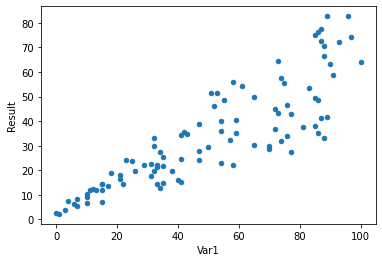

In [74]:
df.plot.scatter(x = 'Var1', y = 'Result')

<AxesSubplot:xlabel='Var5', ylabel='Result'>

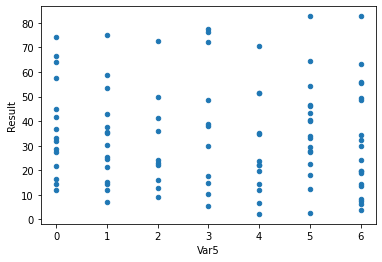

In [76]:
df.plot.scatter(x = 'Var5', y = 'Result')

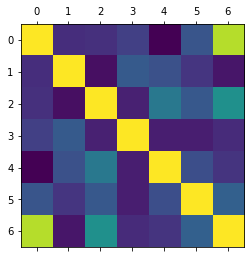

In [77]:
plt.matshow(df.corr())
plt.show()

In [79]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Var1,Var2,Var3,Var4,Var5,Var6,Result
Var1,1.000000,-0.084671,-0.073749,-0.012801,-0.246921,0.083822,0.863578
Var2,-0.084671,1.000000,-0.195767,0.107488,0.061018,-0.052567,-0.169745
Var3,-0.073749,-0.195767,1.000000,-0.130895,0.250658,0.096178,0.380294
Var4,-0.012801,0.107488,-0.130895,1.000000,-0.140940,-0.141297,-0.091506
Var5,-0.246921,0.061018,0.250658,-0.140940,1.000000,0.054503,-0.059112
Var6,0.083822,-0.052567,0.096178,-0.141297,0.054503,1.000000,0.135252
Result,0.863578,-0.169745,0.380294,-0.091506,-0.059112,0.135252,1.000000


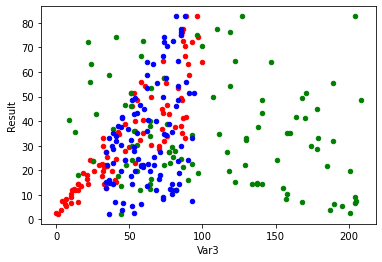

In [80]:
ax1 = df.plot(kind='scatter', x='Var1', y='Result', color='r')    
ax2 = df.plot(kind='scatter', x='Var2', y='Result', color='g', ax=ax1)    
ax3 = df.plot(kind='scatter', x='Var3', y='Result', color='b', ax=ax1)

In [82]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [83]:
df

,0,1,2,3,4,5,6
0,0.32,0.216080,0.850000,0.545455,0.500000,0.869565,0.344138
1,0.31,0.165829,0.283333,0.590909,0.500000,0.869565,0.194113
2,0.03,0.894472,0.183333,0.409091,1.000000,0.652174,0.021361
3,0.81,0.648241,0.166667,0.242424,0.166667,0.434783,0.438649
4,0.88,0.457286,0.700000,0.606061,0.666667,0.130435,0.847491
...,...,...,...,...,...,...,...
95,0.65,0.231156,0.166667,0.015152,0.166667,0.565217,0.348857
96,0.87,0.809045,0.183333,0.287879,0.333333,0.434783,0.486960
97,0.11,0.366834,0.800000,0.681818,0.666667,0.043478,0.121088
98,0.53,0.211055,0.950000,0.560606,0.666667,0.565217,0.614009


In [84]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6
0,1.000000,-0.084671,-0.073749,-0.012801,-0.246921,0.083822,0.863578
1,-0.084671,1.000000,-0.195767,0.107488,0.061018,-0.052567,-0.169745
2,-0.073749,-0.195767,1.000000,-0.130895,0.250658,0.096178,0.380294
3,-0.012801,0.107488,-0.130895,1.000000,-0.140940,-0.141297,-0.091506
4,-0.246921,0.061018,0.250658,-0.140940,1.000000,0.054503,-0.059112
5,0.083822,-0.052567,0.096178,-0.141297,0.054503,1.000000,0.135252
6,0.863578,-0.169745,0.380294,-0.091506,-0.059112,0.135252,1.000000


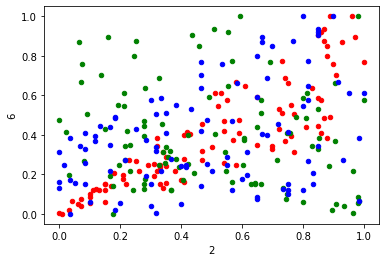

In [85]:
ax1 = df.plot(kind='scatter', x=0, y=6, color='r')    
ax2 = df.plot(kind='scatter', x=1, y=6, color='g', ax=ax1)    
ax3 = df.plot(kind='scatter', x=2, y=6, color='b', ax=ax1)

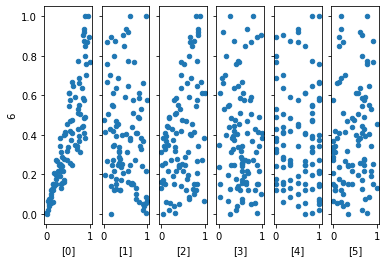

In [86]:
fig, axes = plt.subplots(1,len(df.columns.values)-1, sharey=True)

for i, col in enumerate(df.columns.values[:-1]):
    df.plot(x=[col], y=6, kind="scatter", ax=axes[i])
plt.show()

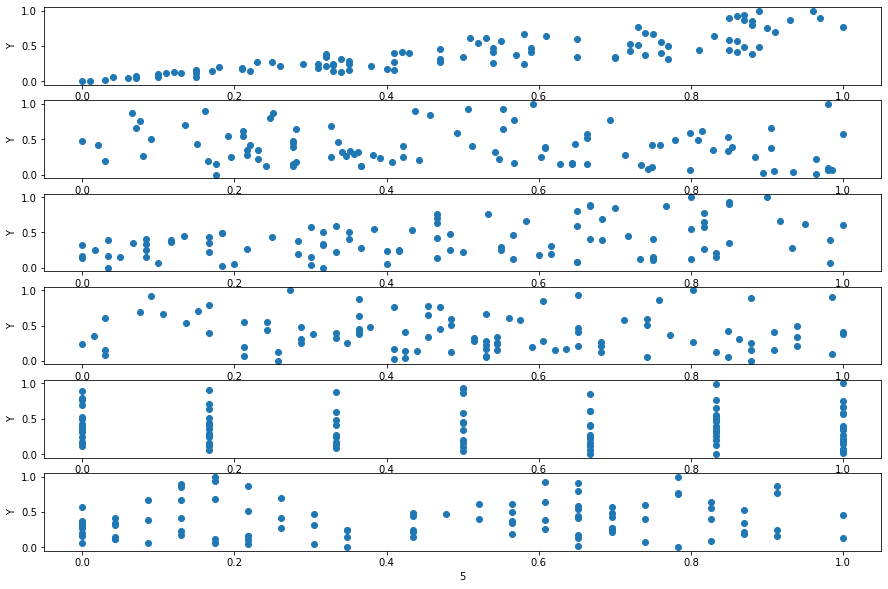

In [87]:
#Scatterplot all columns against last column
fig, ax = plt.subplots(df.shape[1]-1, figsize=(15, 10)) #Figsize ( lenght, height )
for i in range(df.shape[1]-1):  
    
    ax[i].scatter(x = df[i], y = df[6])
    ax[i].set_xlabel(i)
    ax[i].set_ylabel("Y")
plt.show()

Make train and test set
We will generate 1000 rows for the lab

In [50]:
df.shape[1]

7

Train a model
Looks like Var1 and maybe Var3 is the most important 